RANDOM FOREST CLSSIFIERR



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/accident.csv")
df.head()



,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [3]:
df.isna().sum()


,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [4]:
df.dtypes

,0
Age,int64
Gender,object
Speed_of_Impact,float64
Helmet_Used,object
Seatbelt_Used,object
Survived,int64


In [5]:
print("\nDuplicate Rows:", df.duplicated().sum())



Duplicate Rows: 0


In [6]:
df.nunique()


,0
Age,51
Gender,2
Speed_of_Impact,80
Helmet_Used,2
Seatbelt_Used,2
Survived,2


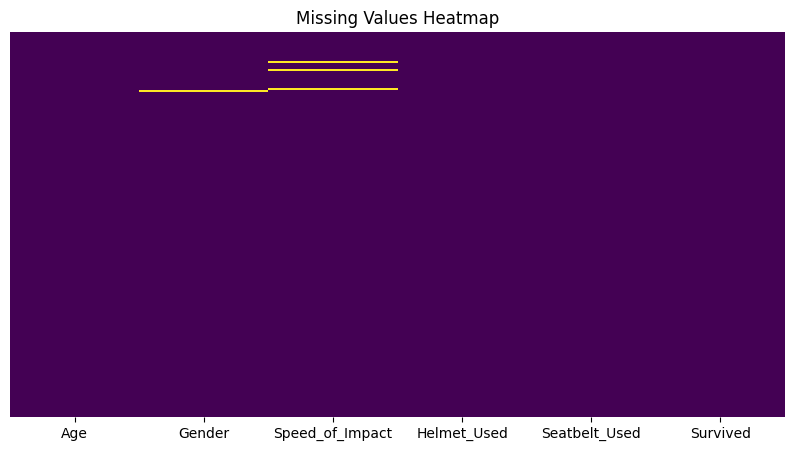

In [7]:

# 1. Missing values heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

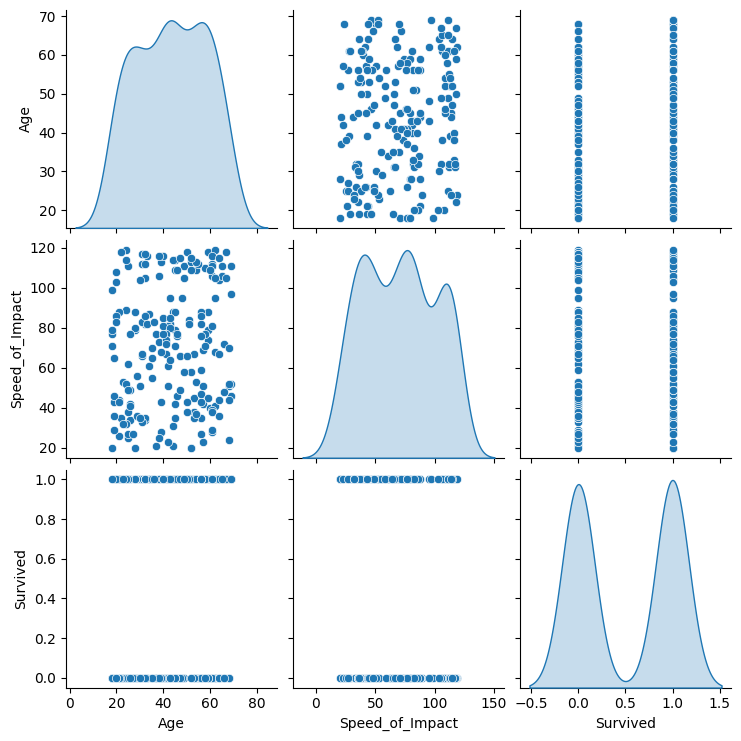

In [8]:

#  Pair plot for numerical features
sns.pairplot(df.sample(min(500, len(df))), diag_kind="kde")
plt.show()

In [9]:
# One-hot encoding Gender and dropping the first category
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Display the first few rows to verify encoding
print(df.head())


   Age  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived  Gender_Male
0   56             27.0          No            No         1        False
1   69             46.0          No           Yes         1        False
2   46             46.0         Yes           Yes         0         True
3   32            117.0          No           Yes         0         True
4   60             40.0         Yes           Yes         0        False


In [10]:

df['Helmet_Used'] = df['Helmet_Used'].map({'Yes': 1, 'No': 0})
df['Seatbelt_Used'] = df['Seatbelt_Used'].map({'Yes': 1, 'No': 0})

# Verify the changes
print(df.head())


   Age  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived  Gender_Male
0   56             27.0            0              0         1        False
1   69             46.0            0              1         1        False
2   46             46.0            1              1         0         True
3   32            117.0            0              1         0         True
4   60             40.0            1              1         0        False


In [11]:
df.corr()['Survived']


,Survived
Age,0.110090
Speed_of_Impact,0.042520
Helmet_Used,-0.041353
Seatbelt_Used,0.059263
Survived,1.000000
Gender_Male,0.121845


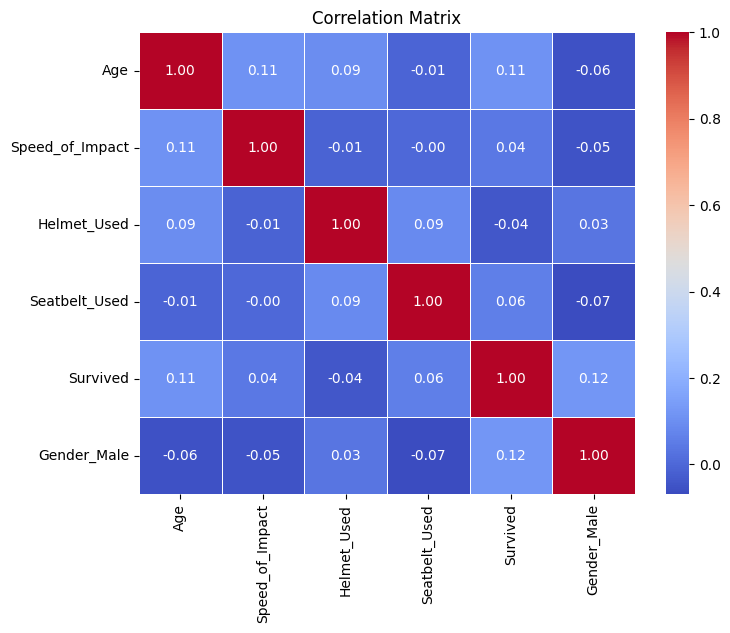

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [13]:
# Checking outliers

from scipy.stats import zscore

z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3)

print("Number of outliers in each column:")
print(outliers.sum(axis=0))

Number of outliers in each column:
Age                0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64


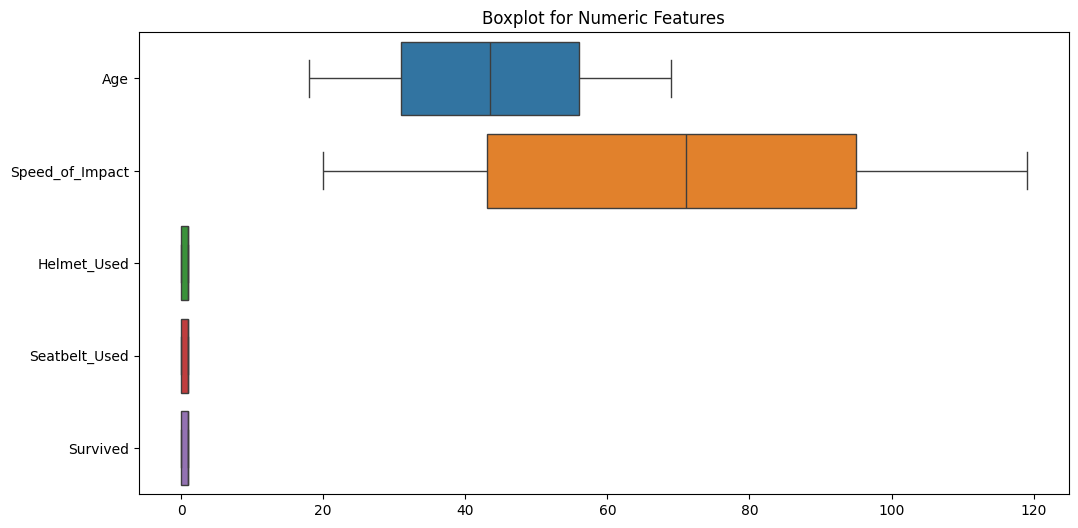

In [14]:

# Boxplot for each numeric column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h")
plt.title("Boxplot for Numeric Features")
plt.show()


In [15]:
df

,Age,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived,Gender_Male
0,56,27.0,0,0,1,False
1,69,46.0,0,1,1,False
2,46,46.0,1,1,0,True
3,32,117.0,0,1,0,True
4,60,40.0,1,1,0,False
...,...,...,...,...,...,...
195,69,111.0,0,1,1,False
196,30,51.0,0,1,1,False
197,58,110.0,0,1,1,True
198,20,103.0,0,1,1,True


In [17]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Features and target
X = df.drop(columns=['Survived'])
y = df['Survived']  # Assuming binary classification (e.g., 1 for high profit, 0 for low profit)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Bagging Classifier directly using RandomForestClassifier as the estimator
bagging_clf = BaggingClassifier(estimator=rf_clf, n_estimators=10, random_state=42)

# Fit model
bagging_clf.fit(X_train_scaled, y_train)

# Predict
y_pred = bagging_clf.predict(X_test_scaled)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.55
F1 Score: 0.5
Precision: 0.5
Recall: 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        22
           1       0.50      0.50      0.50        18

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



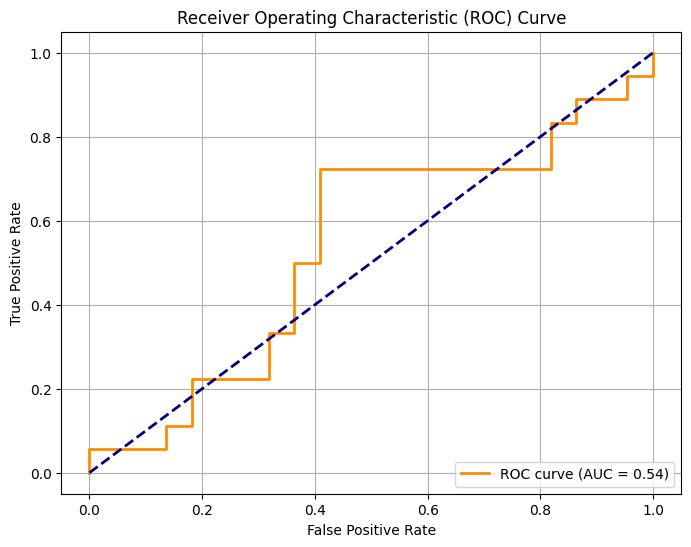

In [18]:
# ROC Curve and AUC
y_probs = bagging_clf.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Accuracy: 0.525
F1 Score: 0.3448275862068966
Precision: 0.45454545454545453
Recall: 0.2777777777777778

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.73      0.63        22
           1       0.45      0.28      0.34        18

    accuracy                           0.53        40
   macro avg       0.50      0.50      0.49        40
weighted avg       0.51      0.53      0.50        40



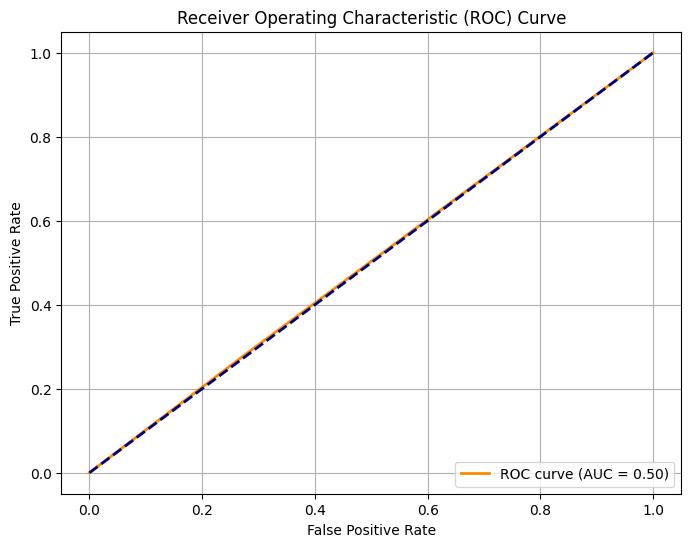

In [20]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Features and target
X = df.drop(columns=['Survived'])
y = df['Survived']  # Assuming binary classification (e.g., 1 for high profit, 0 for low profit)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1, random_state=42)

# Bagging Classifier directly using RandomForestClassifier as the estimator
bagging_clf = BaggingClassifier(estimator=rf_clf, n_estimators=1, random_state=42)

# Fit model
bagging_clf.fit(X_train_scaled, y_train)

# Predict
y_pred = bagging_clf.predict(X_test_scaled)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
y_probs = bagging_clf.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Accuracy: 0.525
F1 Score: 0.45714285714285713
Precision: 0.47058823529411764
Recall: 0.4444444444444444

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.59      0.58        22
           1       0.47      0.44      0.46        18

    accuracy                           0.53        40
   macro avg       0.52      0.52      0.52        40
weighted avg       0.52      0.53      0.52        40



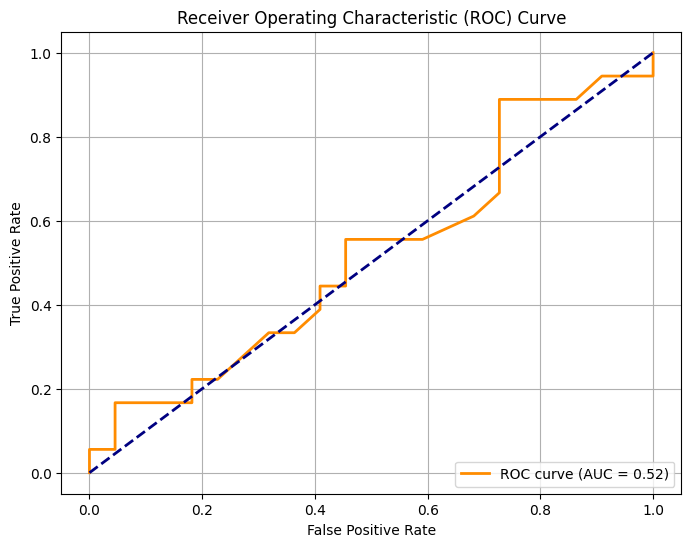

In [21]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Features and target
X = df.drop(columns=['Survived'])
y = df['Survived']  # Assuming binary classification (e.g., 1 for high profit, 0 for low profit)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=9, random_state=42)

# Bagging Classifier directly using RandomForestClassifier as the estimator
bagging_clf = BaggingClassifier(estimator=rf_clf, n_estimators=4, random_state=42)

# Fit model
bagging_clf.fit(X_train_scaled, y_train)

# Predict
y_pred = bagging_clf.predict(X_test_scaled)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
y_probs = bagging_clf.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
